<a href="https://colab.research.google.com/github/reknahs/usaco/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openai
import openai
import time

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 4.0 MB/s eta 0:00:00


In [7]:
import json
f = open("/content/train.json")
options = ["(A)", "(B)", "(C)", "(D)"]
total = 0
questions = []
answers = []
subject = []
choicetype = []
for i in f:
  if total == 20000: break
  total += 1
  data = json.loads(i)
  questions.append(data["question"]+"\n(A) "+data["opa"]+"\n(B) "+data["opb"]+"\n(C) "+data["opc"]+"\n(D) "+data["opd"])
  answers.append(options[data["cop"]-1])
  subject.append(data["subject_name"])
  choicetype.append(data["choice_type"])
print(len(questions))


20000


In [8]:
f = open("/content/responses1.txt", "r")
responses = f.read().split("|-----------")[:-1]
print(len(responses))
print(responses[-1014])
print(questions[999])
#3916

2025
|
Low birth weight baby is defined as baby weighing less than 2500 gm (D).

Low bih weight baby is defined as baby weighing: September 2006
(A) 1000 gm
(B) 1500 gm
(C) 2000 gm
(D) 2500 gm


In [9]:
questions = questions[:310]+questions[400:1000]+questions[2904:]
answers = answers[:310]+answers[400:1000]+answers[2904:]
subject = subject[:310]+subject[400:1000]+subject[2904:]
choicetype = choicetype[:310]+choicetype[400:1000]+choicetype[2904:]

In [10]:
gpt = []
for i in range(310):
  gpt.append(responses[i])
for i in range(1613, 0, -1):
  gpt.append(responses[-i])

In [11]:
real_indices = []
for i in range(len(gpt)):
  r = gpt[i]
  count = 0
  if r.find("(A)") != -1: count += 1
  if r.find("(B)") != -1: count += 1
  if r.find("(C)") != -1: count += 1
  if r.find("(D)") != -1: count += 1

  if count != 1 and "correct answer is" not in r: continue
  real_indices.append(i)
print(len(real_indices))

1474


In [12]:
correct = []
for i in range(100000): correct.append(-1)
for i in range(len(real_indices)):
  ind = real_indices[i]
  r = gpt[ind]
  if (r.find("(A)") != -1) + (r.find("(B)") != -1) + (r.find("(C)") != -1) + (r.find("(D)") != -1) != 1:
    occur = r.find("correct answer is")
    a = r.find("(A)", occur, len(r))
    b = r.find("(B)", occur, len(r))
    c = r.find("(C)", occur, len(r))
    d = r.find("(D)", occur, len(r))
    if a == -1: a = 10000
    if b == -1: b = 10000
    if c == -1: c = 10000
    if d == -1: d = 10000
    if a < b and a < c and b < c:
      correct[ind] = int("(A)" == answers[ind])
    elif b < c and b < d and b < a:
      correct[ind] = int("(B)" == answers[ind])
    elif c < b and c < a and c < d:
      correct[ind] = int("(C)" == answers[ind])
    elif d < b and d < a and d < c:
      correct[ind] = int("(D)" == answers[ind])
  else:
    if "(A)" in r:
      correct[ind] = int("(A)" == answers[ind])
    elif "(B)" in r:
      correct[ind] = int("(B)" == answers[ind])
    elif "(C)" in r:
      correct[ind] = int("(C)" == answers[ind])
    elif "(D)" in r:
      correct[ind] = int("(D)" == answers[ind])

In [13]:
indices = []
for i in real_indices:
  if correct[i] != -1: indices.append(i)
print(correct.count(1), correct.count(0))

1069 389


In [14]:
que = []
cor = []
for i in indices:
  que.append(questions[i])
  cor.append(correct[i])

In [15]:
print(cor.count(1)/(cor.count(0)+cor.count(1)))

0.733196159122085


In [16]:
import pandas as pd
df = pd.DataFrame({"correct": cor, "question": que})
que = df["question"]
cor = df["correct"]

In [17]:
!pip install transformers
from transformers import BertTokenizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 112.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.0 MB/s eta 0:00:00


In [18]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
print(' Original: ', questions[0])
print('Tokenized: ', tokenizer.tokenize(questions[0]))
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(questions[0])))

 Original:  Chronic urethral obstruction due to benign prismatic hyperplasia can lead to the following change in kidney parenchyma
(A) Hyperplasia
(B) Hyperophy
(C) Atrophy
(D) Dyplasia
Tokenized:  ['chronic', 'ur', '##eth', '##ral', 'obstruction', 'due', 'to', 'benign', 'prism', '##atic', 'hyper', '##pl', '##asia', 'can', 'lead', 'to', 'the', 'following', 'change', 'in', 'kidney', 'par', '##en', '##chy', '##ma', '(', 'a', ')', 'hyper', '##pl', '##asia', '(', 'b', ')', 'hyper', '##op', '##hy', '(', 'c', ')', 'at', '##rop', '##hy', '(', 'd', ')', 'd', '##yp', '##las', '##ia']
Token IDs:  [11888, 24471, 11031, 7941, 27208, 2349, 2000, 28378, 26113, 12070, 23760, 24759, 15396, 2064, 2599, 2000, 1996, 2206, 2689, 1999, 14234, 11968, 2368, 11714, 2863, 1006, 1037, 1007, 23760, 24759, 15396, 1006, 1038, 1007, 23760, 7361, 10536, 1006, 1039, 1007, 2012, 18981, 10536, 1006, 1040, 1007, 1040, 22571, 8523, 2401]


In [19]:
input_ids = []
for sent in que:
    encoded_sent = tokenizer.encode(sent, add_special_tokens = True)
    input_ids.append(encoded_sent)

In [20]:
from keras.utils import pad_sequences

MAX_LEN = 128

input_ids = pad_sequences(input_ids, maxlen=MAX_LEN , truncating="post", padding="post")

In [21]:
attention_masks = []
for sent in input_ids:
    att_mask = [int(token_id > 0) for token_id in sent]
    attention_masks.append(att_mask)

In [22]:
from sklearn.model_selection import train_test_split
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, cor, test_size=0.2)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, cor, test_size=0.2)

In [23]:
!pip install torch

In [24]:
import torch
import numpy as np

train_inputs = torch.tensor(np.array(train_inputs))
validation_inputs = torch.tensor(np.array(validation_inputs))

train_labels = torch.tensor(np.array(train_labels))
validation_labels = torch.tensor(np.array(validation_labels))

train_masks = torch.tensor(np.array(train_masks))
validation_masks = torch.tensor(np.array(validation_masks))

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 32

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [25]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = 2,
    output_attentions = False,
    output_hidden_states = False,
)
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [26]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [27]:
from transformers import get_linear_schedule_with_warmup

epochs = 4
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [28]:
import numpy as np

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

import time
import datetime

def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [29]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()

if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [30]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [31]:
import random

seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

loss_values = []

for epoch_i in range(0, epochs):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')
    t0 = time.time()
    total_loss = 0
    model.train()
    for step, batch in enumerate(train_dataloader):
        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()
        outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)
        loss = outputs[0]
        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
    avg_train_loss = total_loss / len(train_dataloader)
    loss_values.append(avg_train_loss)
    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
    print("")
    print("Running Validation...")
    t0 = time.time()
    model.eval()
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    for batch in validation_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        with torch.no_grad():
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)
        logits = outputs[0]
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))
print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...

  Average training loss: 0.61
  Training epcoh took: 0:00:24

Running Validation...
  Accuracy: 0.75
  Validation took: 0:00:02

======== Epoch 2 / 4 ========
Training...

  Average training loss: 0.59
  Training epcoh took: 0:00:22

Running Validation...
  Accuracy: 0.75
  Validation took: 0:00:02

======== Epoch 3 / 4 ========
Training...

  Average training loss: 0.58
  Training epcoh took: 0:00:22

Running Validation...
  Accuracy: 0.75
  Validation took: 0:00:02

======== Epoch 4 / 4 ========
Training...

  Average training loss: 0.56
  Training epcoh took: 0:00:23

Running Validation...
  Accuracy: 0.75
  Validation took: 0:00:02

Training complete!


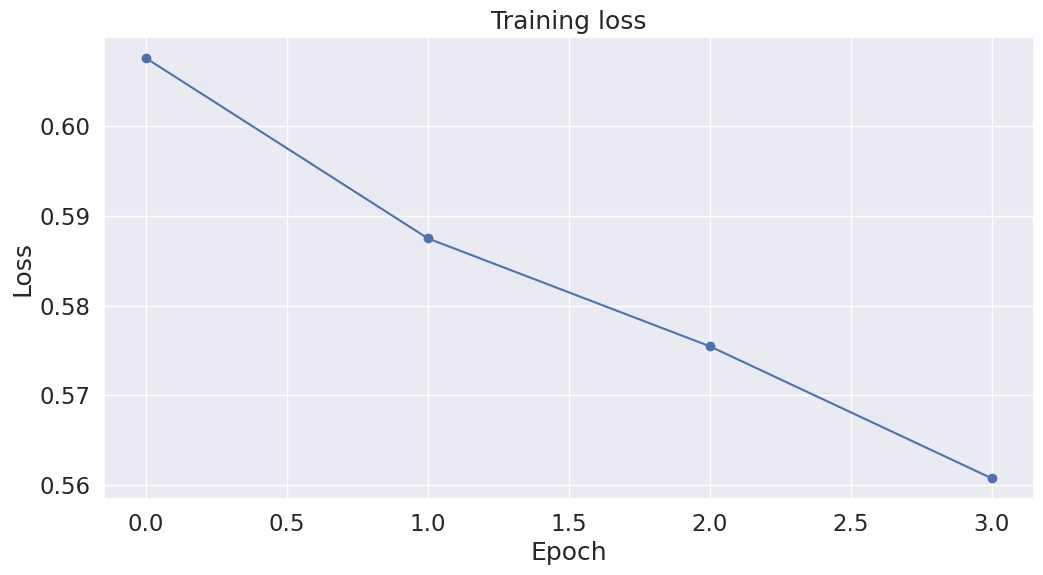

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(style='darkgrid')
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(loss_values, 'b-o')
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [34]:
f = open("model.pt", "wb")
torch.save(model, f)
f.close()